# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     718.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.27e-38
Time:                        16:08:21   Log-Likelihood:                -3.8325
No. Observations:                  50   AIC:                             15.66
Df Residuals:                      46   BIC:                             23.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0311      0.093     54.194      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.53136693  4.99538346  5.42220365  5.78630884  6.07138992  6.27302689
  6.39941502  6.47001838  6.512372    6.5575579   6.63509842  6.76810576
  6.96948476  7.23981262  7.56724408  7.92945759  8.29732264  8.63968586
  8.92848939  9.14338073  9.2750566   9.32679143  9.31389939  9.26121831
  9.1990289   9.15807971  9.16453524  9.23567717  9.37706503  9.58162281
  9.8308015  10.09762666 10.35113023 10.5614385  10.70468028 10.76690885
 10.7463934  10.65390337 10.51093907 10.34619924 10.19086594 10.07348139
 10.01525861 10.02659615 10.10536964 10.23728084 10.39820678 10.55816309
 10.68623036 10.75563413]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.73492718 10.58994692 10.33905592 10.02410022  9.70016388  9.42208256
  9.23101778  9.14437917  9.15156198  9.21654348]


## Plot comparison

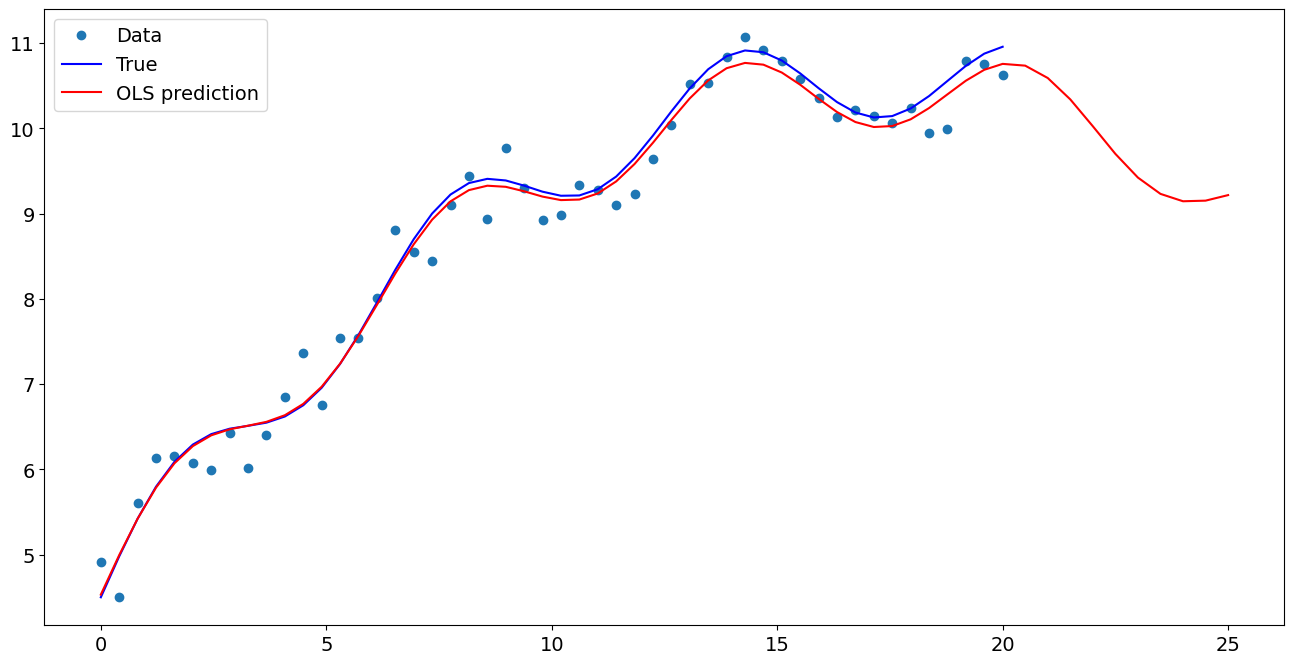

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.031135
x1                  0.489747
np.sin(x1)          0.468240
I((x1 - 5) ** 2)   -0.019991
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.734927
1    10.589947
2    10.339056
3    10.024100
4     9.700164
5     9.422083
6     9.231018
7     9.144379
8     9.151562
9     9.216543
dtype: float64